Title: Finding new genes using decision tree

Authors: Xi Chen, Lap Pui Chung, Sicheng Yang

Date Created: 1/23/22

Instrutor: Professor Steinwand

Course: COSC 380
_______
This notebook was written for the final project.

The main aim is to create a model based on the entire dataset with the hope of identifying new genes using decision tree

In [1]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import tree

np.random.seed(888)

### Getting the data

In [2]:
df = pd.read_csv('COSC380_data.csv')

In [3]:
# transform the dataframe into a format that's analyzable
df = df.T # transpose the dataframe
df = df.rename(columns=df.iloc[0]).drop(df.index[0]).reset_index(drop=True) # move the title to the index column 

X_all = df.iloc[:,1:].astype('float')
y = df['Diagnostic'].astype('uint8')

In [4]:
# spliting into training and test
X_train, X_test, y_train, y_test = train_test_split(
    X_all, y, test_size=0.3, random_state=888)

In [5]:
# fitting the model with decision tree
model = DecisionTreeClassifier().fit(X_train,y_train)

In [6]:
# showing the metrics for the decision tree
y_pred = model.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.6491228070175439
Precision: 0.6923076923076923
Recall: 0.6
F1: 0.6428571428571429


### Pruning the tree with ccp alpha

In [7]:
clf = DecisionTreeClassifier()
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [8]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=888, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.14750910100786035


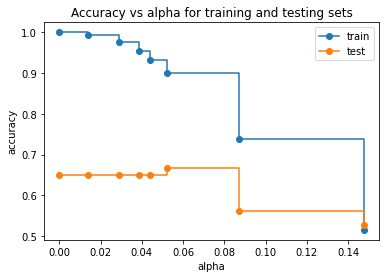

In [9]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [10]:
# it looks like the model is less overfit when ccp is 0.085, so ccp will be set to 0.085
model = DecisionTreeClassifier(criterion = 'gini',
                              ccp_alpha = 0.085).fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.6666666666666666
Precision: 0.7037037037037037
Recall: 0.6333333333333333
F1: 0.6666666666666667


[Text(0.6666666666666666, 0.875, 'X[6153] <= 6.203\ngini = 0.5\nsamples = 130\nvalue = [63, 67]'),
 Text(0.5, 0.625, 'X[11708] <= 6.155\ngini = 0.451\nsamples = 93\nvalue = [61, 32]'),
 Text(0.3333333333333333, 0.375, 'X[13792] <= 12.877\ngini = 0.351\nsamples = 75\nvalue = [58, 17]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.195\nsamples = 64\nvalue = [57, 7]'),
 Text(0.5, 0.125, 'gini = 0.165\nsamples = 11\nvalue = [1, 10]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.278\nsamples = 18\nvalue = [3, 15]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.102\nsamples = 37\nvalue = [2, 35]')]

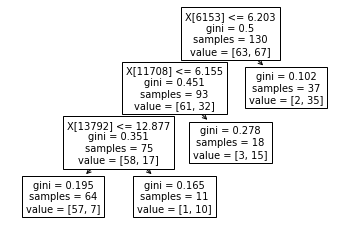

In [11]:
tree.plot_tree(model)

### Getting the names of the genes 

In [12]:
X_all.iloc[:,6153].name

'206628_at'

In [13]:
X_all.iloc[:,11708].name

'212324_s_at'

In [14]:
X_all.iloc[:,13792].name

'214414_x_at'

In [15]:
# check whether the genes from the decision tree appear in the paper or not 

identified_genes = ['203881_s_at','203413_at','209656_s_at','221310_at','209369_at','209267_s_at','210145_at','214146_s_at','218976_at','210397_at','211506_s_at','210168_at','209774_x_at',
'204006_s_at','208892_s_at','202833_s_at','216834_at','202935_s_at','202704_at','201926_s_at','209189_at','201925_s_at','201444_s_at','203908_at','201946_s_at','208654_s_at',
'200760_s_at','201399_s_at','212006_at','210317_s_at','207791_s_at','201689_s_at','204427_s_at','202118_s_at','220199_s_at','217826_s_at','200729_s_at','201635_s_at',
'214007_s_at','221765_at','215628_x_at','207756_at','206056_x_at','207953_at','215208_x_at','215609_at','216858_x_at','204403_x_at','215978_x_at','222104_x_at','208246_x_at',
'208137_x_at','206169_x_at','210679_x_at','215604_x_at','219392_x_at','215600_x_at','217715_x_at','214594_x_at','214715_x_at','218155_x_at','214707_x_at','217679_x_at','215907_at',
'217653_x_at','207730_x_at','219678_x_at','220720_x_at','213089_at','217446_x_at','222358_x_at','215800_at','221191_at','209204_at','215204_at','215385_at','213813_x_at','220389_at','213736_at','222027_at']

In [16]:
for gene in [6153,11708,13792]:
    print(X_all.iloc[:,gene].name not in identified_genes)


True
True
True
